# __Finance 6470: Final Exam__

<br>

Finance 6470: Derivatives Markets <br>
Tyler J. Brough <br>
Last Updated: April 11, 2019 <br>
<br>
<br>

## Numerical Workout Problems

<br>


**1.** Let $S = \$100$, $K = \$95$, $r = 8\%$ (continuously compounded), $\sigma = 30\%$, $\delta = 0$, $T = 1$ year, and $n = 3$ (binomial periods).
  
* What is the price for an American call option?
* What is the price for a European call option? What do you conclude about early exercise for the American call option?
* What is the price for a European put option? Is put-call parity satisfied?
* What is the price for an America put option?

<br>

## American Call

In [5]:
from probo.marketdata import MarketData
from probo.payoff import VanillaPayoff, call_payoff, put_payoff
from probo.engine import BinomialPricingEngine, AmericanBinomialPricer, BlackScholesPricingEngine, BlackScholesPricer
from probo.facade import OptionFacade

## Set up the market data
spot = 100.0
rate = 0.08
volatility = 0.30
dividend = 0.0
thedata = MarketData(rate, spot, volatility, dividend)

## Set up the option
expiry = 1.0 
strike = 95.0
thecall = VanillaPayoff(expiry, strike, call_payoff)
theput = VanillaPayoff(expiry, strike, put_payoff)

## Set up the European Binomial pricer
steps = 3 
pricer = AmericanBinomialPricer
binomengine = BinomialPricingEngine(steps, pricer) 

## Calculate the price
option1 = OptionFacade(thecall, binomengine, thedata)
price1 = option1.price()
print("The call price via American Binomial is: {0:.3f}".format(price1))

The call price via American Binomial is: 18.283


## European Call

In [6]:
from probo.engine import EuropeanBinomialPricer

## Set up the European Binomial pricer
steps = 3 
pricer = EuropeanBinomialPricer
binomengine = BinomialPricingEngine(steps, pricer) 

## Calculate the price
option1 = OptionFacade(thecall, binomengine, thedata)
price1 = option1.price()
print("The call price via European Binomial is: {0:.3f}".format(price1))

The call price via European Binomial is: 18.283


Since there is no dividend in the problem, the price of the American call and European call will be equivalent, meaning there is absolutely no value to the early exercise option in the American call.

## European Put

In [7]:
option2 = OptionFacade(theput, binomengine, thedata)
price2 = option2.price()
print("The put price via European Binomial is: {0:.3f}".format(price2))

The put price via European Binomial is: 5.979


## Forward Contract

In [8]:
import numpy as np

forward = spot * np.exp(rate * expiry)
forward

108.32870676749586

Put-Call Parity = Call - Put = Discount * (Forward - Strike)

In [9]:
Call_Minus_Put = price1 - price2
Call_Minus_Put

12.303947093269588

In [10]:
Disc_Forward_Minus_Strike = (forward - strike) * np.exp(-rate * expiry)
Disc_Forward_Minus_Strike

12.303947093269604

In [11]:
round(Call_Minus_Put - Disc_Forward_Minus_Strike)

-0.0

Put-Call parity holds.

## American Put

In [12]:
option2 = OptionFacade(theput, binomengine, thedata)
price2 = option2.price()
print("The put price via American Binomial is: {0:.3f}".format(price2))

The put price via American Binomial is: 5.979


**2.** Make the same assumptions as in the previous problem, except let $\delta = 0.03$.

* Price an American call option with $n = 200$ binomial periods. 
* Now price a European call option using the Black-Scholes-Merton model.
* Compare the different results. 

<br>

## American Call

In [13]:
## Set up the market data
spot = 100.0
rate = 0.08
volatility = 0.30
dividend = 0.03
thedata = MarketData(rate, spot, volatility, dividend)

## Set up the option
expiry = 1.0 
strike = 95.0
thecall = VanillaPayoff(expiry, strike, call_payoff)
theput = VanillaPayoff(expiry, strike, put_payoff)

## Set up the European Binomial pricer
steps = 200
pricer = AmericanBinomialPricer
binomengine = BinomialPricingEngine(steps, pricer) 

## Calculate the price
option1 = OptionFacade(thecall, binomengine, thedata)
price1 = option1.price()
print("The call price via American Binomial is: {0:.3f}".format(price1))

The call price via American Binomial is: 18.382


Though there is now a dividend involved, there is still no value to the early exercise option of the American call.

## European Call via Black-Scholes

In [14]:
## Set up the European Binomial pricer
pricer = EuropeanBinomialPricer
binomengine = BinomialPricingEngine(steps, pricer) 

## Set up the Black-Scholes pricer
bsengine = BlackScholesPricingEngine("call", BlackScholesPricer)
option3 = OptionFacade(thecall, bsengine, thedata)
price3 = option3.price()
print("The call price via Black-Scholes is: {0:.3f}".format(price3))

The call price via Black-Scholes is: 16.305


The black scholes price is much different than the price via binomial pricing, even with 200 steps. In fact, there is almost a $2 difference in the premium computed via the 2 differing models.

## Computational Problems

**3.** The binomial model of underlying asset price dynamics is given as follows (see McDonald Chapter 11):

$$
S_{t+h} = S_{t} e^{(r - \delta)h \pm \sigma\sqrt{h}}
$$
Assume the following data and parameters are given:

* $S_{0} = \$100$
* $r = 6\%$ 
* $\sigma = 30\%$
* $T = 5$ years
* $h = 0.01$

<br>

Simulate 500 steps in a path and plot the results below.

<br>

In [15]:
# Simulate Returns

import pandas as pd
import matplotlib.pyplot as plt

spot = 100
r = 0.06
v = 0.3
T = 5
h = 0.01
d = 0.0
steps = 500

u = np.exp((r - d) * h + v * np.sqrt(h))
d = np.exp((r - d) * h - v * np.sqrt(h))
p = (np.exp((r - d) * h) - d) / (u - d)
a = np.random.uniform(size=steps)

path = np.empty(steps)
path[0] = spot

for i in range(1, steps):
    if a[i] > 0.5:
        path[i] = path[i - 1] * u
    else:
        path[i] = path[i - 1] * d
path = pd.Series(path)
path.plot();

<br>
<br>

Now repeat this process 1,000 times and store only the resulting terminal price for each simulated path. Plot a histogram for these resulting terminal prices. Comment on the shape of the histogram. 

<br>
<br>

In [16]:
## Histogram of terminal prices 

path = np.empty(steps)
path[0] = spot
reps = 1000
terminal = np.empty(reps)

for j in range(reps):
    a = np.random.uniform(size=steps)
    for i in range(1, steps):
        a = np.random.rand()
        if a > 0.5:
            path[i] = path[i - 1] * u
        else:
            path[i] = path[i - 1] * d
    terminal[j] = path[-1]

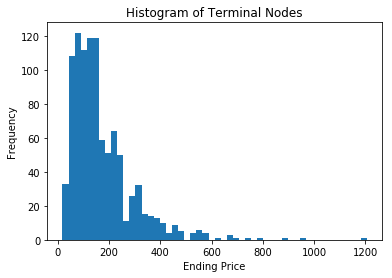

In [17]:
plt.hist(terminal, bins=50)
plt.title('Histogram of Terminal Nodes')
plt.ylabel('Frequency')
plt.xlabel('Ending Price');

The histogram has a large concentration between 0 and 200, since most of the simulations will not result in extreme returns. The spot price can not go negative, however, so the distribution is right skewed because of the possibility of extreme positive returns.

**4.** Now let's rearrange this original formula into a statment about returns (see McDonald Chapter 11).

$$
\ln{\left(S_{t+h} / S_{t}\right)} = (r - \delta)h \pm \sigma\sqrt{h}
$$

<br>
<br>

Similar to the exercise above simulate a sample path with 500 steps and make a plot. Also, simulate the process 1,000 times keeping only the terminal return. Make a histogram of the resulting simulated terminal returns. Comment on the shape of the histogram. 

<br>

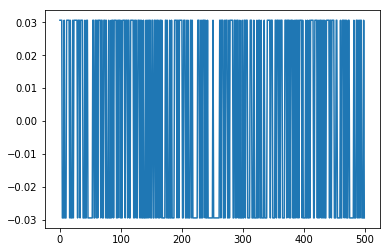

In [18]:
## Simulate returns

spot = 100
r = 0.06
v = 0.3
T = 5
h = 0.01
d = 0.0
steps = 500

u = (r - d) * h + v * np.sqrt(h)
d = (r - d) * h - v * np.sqrt(h)
a = np.random.uniform(size=steps)

returns = np.empty(steps)

for i in range(0, steps):
    if a[i] > 0.5:
        returns[i] = u
    else:
        returns[i] = d
returns = pd.Series(returns)
returns.plot();

In [19]:
## Histogram of terminal prices 

returns = np.empty(steps)
reps = 1000
terminal = np.empty(reps)

for j in range(reps):
    a = np.random.uniform(size=steps)
    for i in range(0, steps):
        for i in range(0, steps):
            if a[i] > 0.5:
                returns[i] = u
            else:
                returns[i] = d
    terminal[j] = returns[-1]

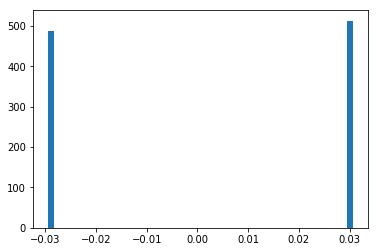

In [20]:
plt.hist(terminal, bins=50);

Since there are 2 possible return results, the histogram is just 2 bars in either the positive result or negative result.

**5.** The Black-Scholes-Merton model assumes that the underlying asset price follows geometric Brownian motion as follows:

<br>

$$
S_{t+h} = S_{t} e^{(r - \delta - \frac{1}{2}\sigma^{2})h + \sigma \sqrt{h} Z}
$$
where $Z \sim N(0,1)$. Assume the following:

* $S_{0} = \$40.0$
* $K = \$40.0$
* $r = 8\%$
* $\sigma = 30\%$
* $T = 91/365$ days
* $\delta = 0.0$

<br>

Simulate prices for 10 days and calculate mark-to-market profits/losses for the delta-hedged position on a written put option. Explain the results.

<br>

In [39]:
def bsmPutPrice(S, K, r, v, q, T):
    d1 = (np.log(S/K) + (r - q + 0.5 * v * v) * T) / (v * np.sqrt(T))
    d2 = (np.log(S/K) + (r - q - 0.5 * v * v) * T) / (v * np.sqrt(T))
    putPrc =  K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)
    
    return putPrc 

In [40]:
def bsmPutDelta(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    delta = np.exp(-div * tau) * norm.cdf(-d1)

    return delta

In [41]:
spot = 40.0
strike = 40.0
r = 0.08
v = 0.30
T = 91.0 / 365.0
d = 0.0

## Initial Prices

In [42]:
from scipy.stats import norm

In [43]:
PutPrc = bsmPutPrice(spot, strike, r, v, d, T)
print(f"The Value of the European Put Option is: {PutPrc : 0.04f}")

The Value of the European Put Option is:  1.9905


In [44]:
PutDelta = bsmPutDelta(spot, strike, v, r, T, d)
print(f"The Value of the European Put Delta is: {PutDelta : 0.04f}")

The Value of the European Put Delta is:  0.4176


## Simulated Path

In [45]:
N = 11
dt = 1.0/N
z = np.random.normal(size=N)
nudt = (r - d - 0.5 * v * v) * dt
sigdt = (v * np.sqrt(dt))

path = np.zeros(N)
path[0] = spot

for t in range(1,N):
    path[t] = path[t-1] * np.exp(nudt + sigdt * z[t])

## Marking to Market

In [46]:
Put_prices = np.zeros(N)
Put_prices[0] = PutPrc * 100

for i in range(1, N):
    Put_prices[i] = bsmPutPrice(path[i], strike, r, v, d, T - (i/365.0)) * 100

In [47]:
Put_deltas = np.zeros(N)
Put_deltas[0] = PutDelta * 100

for i in range(1, N):
    Put_deltas[i] = bsmPutDelta(path[i], strike, v, r, T - (i/365.0), d) * 100

In [48]:
Investment = np.zeros(N)
for i in range(N):
    Investment[i] = Put_deltas[i] * path[i] - Put_prices[i]

In [49]:
Interest = np.zeros(N)
for i in range(1, N):
    Interest[i] = -(r / 365.0) * Investment[i-1]

In [50]:
Daily_profit = np.zeros(N)
for i in range(1, N):
    Daily_profit[i] = Put_deltas[i-1] * (path[i-1] - path[i]) + (Put_prices[i-1] - Put_prices[i]) - Interest[i]

In [51]:
Capital_gain = np.zeros(N)
for i in range(1, N):
        Capital_gain[i] = Capital_gain[i-1] + Daily_profit[i]

## Results

In [52]:
Market_to_market = pd.DataFrame({'': ['Stock ($)', 'Put ($)', '100 x Delta', 'Investment ($)', 'Interest ($)', \
                                        'Capital gain ($)', 'Daily Profit ($)']})

In [53]:
for i in range(N):
    Market_to_market[i] = 1

In [54]:
for i in range(N):
    Market_to_market.loc[0, i] = round(path[i], 2)
    Market_to_market.loc[1, i] = round(Put_prices[i], 2)
    Market_to_market.loc[2, i] = round(Put_deltas[i], 2)
    Market_to_market.loc[3, i] = round(Investment[i], 2)
    Market_to_market.loc[4, i] = round(Interest[i], 2)
    Market_to_market.loc[6, i] = round(Daily_profit[i], 2)
    Market_to_market.loc[5, i] = round(Capital_gain[i], 2)

In [55]:
Market_to_market

,,0,1,2,3,4,5,6,7,8,9,10
0,Stock ($),40.00,46.32,49.48,51.24,42.26,42.79,38.27,39.42,36.87,37.90,39.20
1,Put ($),199.05,42.07,16.35,9.11,116.74,101.69,276.63,218.43,358.55,295.13,226.00
2,100 x Delta,41.76,11.68,5.04,2.96,28.13,25.28,54.14,46.10,64.48,57.22,47.88
3,Investment ($),1471.33,498.82,232.92,142.68,1071.91,980.09,1795.31,1598.74,2018.60,1873.43,1650.93
4,Interest ($),0.00,-0.32,-0.11,-0.05,-0.03,-0.23,-0.21,-0.39,-0.35,-0.44,-0.41
5,Capital gain ($),0.00,-106.50,-117.59,-119.20,-200.19,-199.81,-260.26,-263.64,-285.89,-288.50,-293.33
6,Daily Profit ($),0.00,-106.50,-11.08,-1.61,-80.99,0.38,-60.45,-3.38,-22.25,-2.61,-4.83


Though the market maker is selling shares short, they will still have to borrow those shares and pay interest on the amount borrowed. The market maker is going to be delta hedged, but not gamma hedged, and we can see this in the data since the market maker is losing money each day there is a large swing in either direction. Though the market maker does make a small profit on the days when there are only small movements in the stock, they are losing a large amount on each of the days with large changes, leading to a fairly significant loss over the life of the delta hedge.

Obviously this is going to depend on the simulation, however I have looked at several different simulations, and they all end up negative for the market maker. This shows the importance of gamma.

<br>
<br>

**6.** The Black-Scholes-Merton (BSM) technique for deriving their famous formula was to conceive of an option market-maker delta hedging in continuous time. Check your intuition for this process by simulating the process and comparing the results to the Black-Scholes-Merton formula. Assume the parameters as above, except let $T = 1$ year and $\mu = 10\%$. Note that you must simulate asset prices under the real-world density (not the risk-neutral density). In the simulation let $h = \frac{1}{365}$, and $M = 10,000$ replications. Use the same geometric Brownian motion process as above and make sure to check for terminal exercise. The average cost of hedging should approximate the BSM price. Compare the delta-hedging simulation results to the theoretical results from the BSM model. (See McDonald Chapters 13 & 19).

<br>

*Note:* if you find this exercise challenging, just think of the single-period binomial model $C = \Delta S + B$. You won't actually use this model directly (you will use the BSM delta instead), but it should give you inspiration.

<br>
<br>

In [75]:
spot = 40.0
strike = 40.0
mu = 0.10
v = 0.30
T = 365.0 / 365.0
d = 0.0
m = 10000
n = 365
h = T / n

In [76]:
def AssetPaths(spot, mu, sigma, expiry, div, nreps, nsteps):
    paths = np.empty((nreps, nsteps + 1))
    h = expiry / nsteps
    paths[:, 0] = spot
    mudt = (mu - div - 0.5 * sigma * sigma) * h
    sigmadt = sigma * np.sqrt(h)
    
    for t in range(1, nsteps + 1):
        z = np.random.normal(size=nreps)
        paths[:, t] = paths[:, t-1] * np.exp(mudt + sigmadt * z)

    return paths

In [77]:
def deltaHedging(S, K, mu, sigma, r, T, paths):
    m, n = paths.shape
    cost = np.zeros(m)
    cashFlows = np.zeros(n)
    h = T / n
    df = np.exp(-r * np.arange(n) * h)
    tau = T - np.arange(n) * h
    
    for k in range(m):
        path = paths[k]
        position = 0.0
        deltas = bsmPutDelta(path, K, v, r, T, d)
        
        for t in range(n):
            cashFlows[t] = (position - deltas[t]) * path[t]
            position = deltas[t]
            
        if (path[-1] <= K):
            cashFlows[-1] = K - (1 - position) * path[-1]
        else:
            cashFlows[-1] = position * path[-1]
        
        cost[k] = np.dot(df, cashFlows)
        
    return np.mean(cost)

In [78]:
paths = AssetPaths(spot, mu, v, T, d, m, n)
delHdgPrc = deltaHedging(spot, strike, mu, v, r, T, paths)
bsmPrc = bsmPutPrice(spot, strike, r, v, d, T)
print(f"The BSM Put Price is: {bsmPrc : 0.4f}")
print(f"The Delta-Hedging Monte Carlo Put Price is: {delHdgPrc : 0.4f}")

The BSM Put Price is:  3.2092
The Delta-Hedging Monte Carlo Put Price is:  3.2090


The price via delta-hedging Monte Carlo is very, very close to the Black-Scholes price. This shows the brilliance of Black-Scholes in the way they derived their formula based on a delta hedging theory. It also shows that the Black-Scholes price suffers the same issue as the delta-hedging strategy, in that when the option gets further out of the money, Black-Scholes will underestimate the price.

## Brief Essay Problems


<br>
<br>

**7.** According to Christopher Culp "... it becomes quite hard to explain a lot of financial and derivatives market activity without being a little bit Austrian." Discuss this statement in the context of the delta-hedging process of the option market-maker. You may also want to reference the Enron (Culp & Hanke) and Metallgesellschaft (Culp & Miller) cases and the citations therein. 

Austrians believe that markets are in a state of disequilibrium, constantly trying to revert to a long-run equilibrium state, but will never quite reach it. Financial markets often behave in this way because of the no-arbitrage pricing theory. Prices of derivatives should be in an equilibrium state with their underlying counterpart, but we see arbitrage opportunities occasionally that hedge funds and other traders can take advantage of. This can be looked at in the context of a delta-hedging options market-maker because the market-maker must find ways to use both the underlying and the derivative securities to remain in a constant state of risklessness. We see with our delta-hedging example, however, that this is not possible because of the parameter gamma that also must be considered.
A market-maker is in the moving business and not the storage business, meaning they will make their profit on the spread they charge for the risk they hold. They are not looking for arbitrage opportunities, but still rely on the no-arbitrage pricing theory.
The process that a market-maker uses to delta-hedge can be looked at from an Austrian perspective. They are constantly trying to give themselves zero delta exposure by calculating the daily delta of the option they have sold, and will buy or sell shares to keep a constant net delta position of zero. This process is Austrian because the market-maker is seeking to remain in a state of equilibrium between the derivative and the underlying, but we see in the example above that this can't be accomplished because of volatility that is in the market. This volatility is unknown price information being introduced into the market, and in an Austrian view, this is possible.
Enron and MGRM also acted as market-makers in their respective hedging strategies. When performing this act of synthetic storage, they were making a market to those looking to buy oil at a fixed price, and would then hedge this with short-dated futures contracts. We have seen throughout the course of the semester that we can apply an error-correction model to this strategy. This error-correction model is the exact definition of an Austrian model in financial markets. It shows that there will be a mean-reverting relationship between the spot and futures contracts, and when employed, though it didn't work for Enron or MGRM, we have seen during the semester that it is quite brilliant and can be profitable.
Now we can apply this same error-correction process to the delta-hedging strategy applied by our options market-maker. They are assuming that there will be some sort of error-correcting process between the option and the underlying, and this will be shown through the delta in the option. This leads the market-maker to believe they can have a hedged position simply by buying delta shares of the underlying. This Austrian view of an error-correcting mechanism is widely employed in financial markets, and shows why Culp believes you must be Austrian to explain this process.